<a href="https://colab.research.google.com/github/Chovy-Culver/weatherwise-Chufengsheng-Zheng-doe/blob/main/WeatherWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import requests
from datetime import datetime

def fetch_daily_weather(location):
    """
    Fetches 5-day forecast from OpenWeatherMap with one data point per day at 12:00 PM.

    Args:
        location (str): Name of the city (e.g., "Sydney")

    Returns:
        dict: {
            "city": str,
            "forecast": [
                {
                    "date": "YYYY-MM-DD",
                    "weather": str,
                    "temperature": float,
                    "humidity": int,
                    "precipitation": float,
                    "wind_speed": float
                }, ...
            ]
        }
        or None if the request fails
    """
    API_KEY = "1da7dea923d784a5dd83bac94cde8d65"
    url = f"https://api.openweathermap.org/data/2.5/forecast?q={location}&appid={API_KEY}&units=metric"

    try:
        response = requests.get(url)
        data = response.json()

        if response.status_code != 200 or "list" not in data:
            return None

        city = data["city"]["name"]
        raw_entries = data["list"]
        daily_forecast = []
        seen_dates = set()

        for entry in raw_entries:
            dt = datetime.strptime(entry["dt_txt"], "%Y-%m-%d %H:%M:%S")
            date_str = dt.strftime("%Y-%m-%d")
            hour = dt.strftime("%H")

            if date_str not in seen_dates and hour == "12":
                forecast = {
                    "date": date_str,
                    "weather": entry["weather"][0]["description"],
                    "temperature": entry["main"]["temp"],
                    "humidity": entry["main"]["humidity"],
                    "precipitation": entry.get("rain", {}).get("3h", 0.0),
                    "wind_speed": entry["wind"]["speed"]
                }
                daily_forecast.append(forecast)
                seen_dates.add(date_str)

        return {
            "city": city,
            "forecast": daily_forecast
        }

    except Exception:
        return None


# Example usage
if __name__ == "__main__":
    result = fetch_daily_weather("Perth")
    if result:
        from pprint import pprint
        pprint(result)
    else:
        print("No data returned.")



{'city': 'Perth',
 'forecast': [{'date': '2025-05-18',
               'humidity': 30,
               'precipitation': 0.0,
               'temperature': 23.21,
               'weather': 'clear sky',
               'wind_speed': 2.03},
              {'date': '2025-05-19',
               'humidity': 63,
               'precipitation': 0.0,
               'temperature': 17.64,
               'weather': 'clear sky',
               'wind_speed': 7.12},
              {'date': '2025-05-20',
               'humidity': 48,
               'precipitation': 0.0,
               'temperature': 18.69,
               'weather': 'clear sky',
               'wind_speed': 3.47},
              {'date': '2025-05-21',
               'humidity': 47,
               'precipitation': 0.0,
               'temperature': 18.95,
               'weather': 'clear sky',
               'wind_speed': 3.03},
              {'date': '2025-05-22',
               'humidity': 58,
               'precipitation': 0.0,
         

In [54]:
def extract_weather_series(weather_data):
    """
    Extracts daily weather time series for plotting from structured weather data.

    Args:
        weather_data (dict): Output from fetch_daily_weather()

    Returns:
        dict: {
            "dates": [str],
            "temperature": [float],
            "precipitation": [float],
            "wind_speed": [float]
        }
        or None if input is invalid
    """
    if not weather_data or "forecast" not in weather_data:
        return None

    dates = []
    temperature = []
    precipitation = []
    wind_speed = []

    for entry in weather_data["forecast"]:
        dates.append(entry["date"])
        temperature.append(entry["temperature"])
        precipitation.append(entry["precipitation"])
        wind_speed.append(entry["wind_speed"])

    return {
        "dates": dates,
        "temperature": temperature,
        "precipitation": precipitation,
        "wind_speed": wind_speed
    }
# Call both functions to test
data = fetch_daily_weather("Perth")
if data:
    series = extract_weather_series(data)
    from pprint import pprint
    pprint(series)
else:
    print("No data returned.")

{'dates': ['2025-05-18',
           '2025-05-19',
           '2025-05-20',
           '2025-05-21',
           '2025-05-22'],
 'precipitation': [0.0, 0.0, 0.0, 0.0, 0.0],
 'temperature': [23.37, 17.64, 18.69, 18.95, 20.59],
 'wind_speed': [2.03, 7.12, 3.47, 3.03, 5.39]}


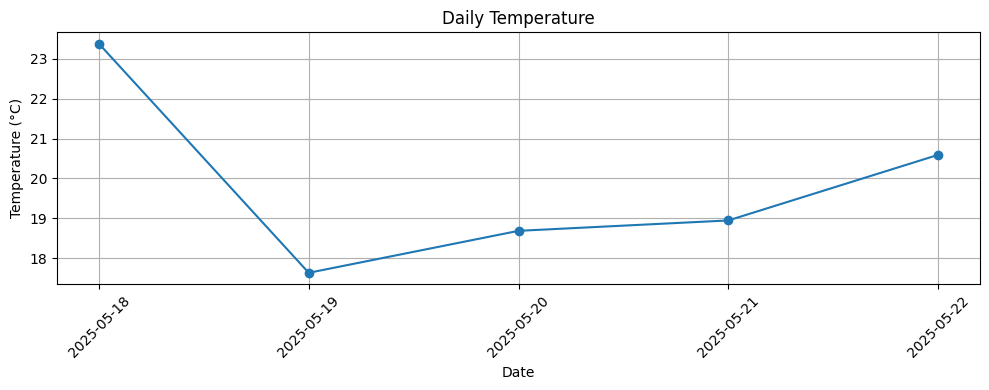

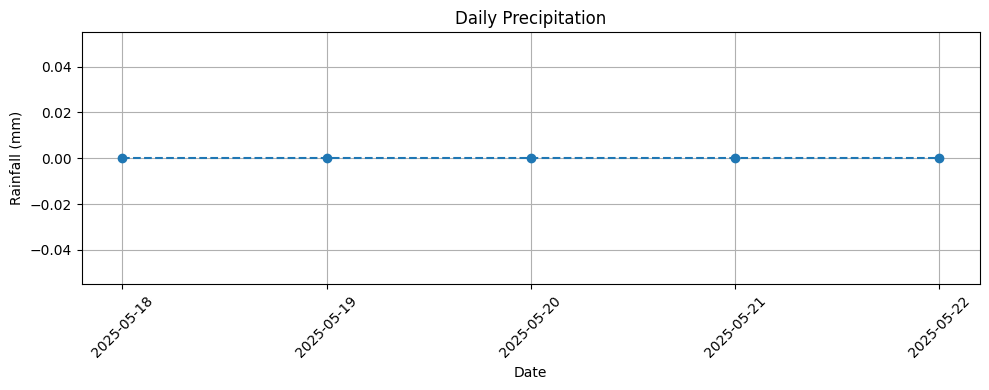

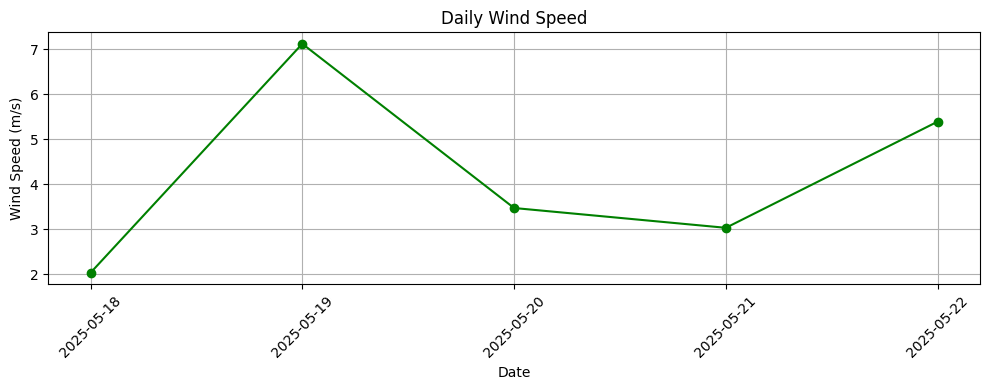

In [55]:
import matplotlib.pyplot as plt

def draw_weather_charts(series_data):
    """
    Draws separate line charts for temperature, precipitation, and wind speed.

    Args:
        series_data (dict): Output from extract_weather_series()
    """
    if not series_data:
        print("No data to plot.")
        return

    dates = series_data["dates"]
    temperature = series_data["temperature"]
    precipitation = series_data["precipitation"]
    wind_speed = series_data["wind_speed"]

    # Temperature plot
    plt.figure(figsize=(10, 4))
    plt.plot(dates, temperature, marker='o')
    plt.title("Daily Temperature")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Precipitation plot
    plt.figure(figsize=(10, 4))
    plt.plot(dates, precipitation, marker='o', linestyle='--')
    plt.title("Daily Precipitation")
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Wind speed plot
    plt.figure(figsize=(10, 4))
    plt.plot(dates, wind_speed, marker='o', color='green')
    plt.title("Daily Wind Speed")
    plt.xlabel("Date")
    plt.ylabel("Wind Speed (m/s)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    data = fetch_daily_weather("Perth")
    if data:
        series = extract_weather_series(data)
        draw_weather_charts(series)
    else:
        print("No data available.")


In [64]:
import re
from datetime import datetime, timedelta

def parse_weather_question(question):
    """
    Parses a natural language question into structured data.

    Args:
        question (str): User input question

    Returns:
        dict: {
            "location": str or None,
            "date": str in YYYY-MM-DD or None,
            "attribute": str ("temperature", "precipitation", "wind_speed")
        }
    """
    question = question.lower()

    # Attribute matching
    if re.search(r"\brain|precipitation\b", question):
        attribute = "precipitation"
    elif re.search(r"\bwind\b|\bwind speed\b|\bstrong wind\b", question):
        attribute = "wind_speed"
    elif re.search(r"\btemperature\b|\bhot\b|\bcold\b", question):
        attribute = "temperature"
    else:
        attribute = None

    # Date parsing
    today = datetime.today()
    weekdays = {
        "monday": 0,
        "tuesday": 1,
        "wednesday": 2,
        "thursday": 3,
        "friday": 4,
        "saturday": 5,
        "sunday": 6
    }

    if "today" in question:
        target_date = today
    elif "tomorrow" in question:
        target_date = today + timedelta(days=1)
    else:
        target_date = None
        for day, idx in weekdays.items():
            if day in question:
                delta = (idx - today.weekday()) % 7
                target_date = today + timedelta(days=delta)
                break

    # Location parsing
    location_match = re.search(r"in ([a-zA-Z\s]+)", question)
    location = location_match.group(1).strip().title() if location_match else None

    return {
        "location": location,
        "date": target_date.strftime("%Y-%m-%d") if target_date else None,
        "attribute": attribute
    }


def generate_weather_response(parsed, weather_data):
    """
    Generates a human-readable response based on parsed query and weather forecast.

    Args:
        parsed (dict): Output from parse_weather_question
        weather_data (dict): Output from fetch_daily_weather()

    Returns:
        str: Textual weather response
    """
    date = parsed.get("date")
    attr = parsed.get("attribute")

    if not date or not attr:
        return "Sorry, I couldn't understand your question clearly."

    for entry in weather_data.get("forecast", []):
        if entry["date"] == date:
            value = entry.get(attr, None)
            if value is None:
                return f"Sorry, I couldn't find {attr} data for that day."

            if attr == "temperature":
                return f"The expected temperature on {date} is {value}°C."
            elif attr == "precipitation":
                return f"The forecasted rainfall on {date} is {value} mm."
            elif attr == "wind_speed":
                return f"The expected wind speed on {date} is {value} m/s."

    return f"Sorry, I have no forecast data for {date}."


def ask_weather_question(weather_data):
    """
    Allows user to ask a question and responds with parsed weather info.

    Args:
        weather_data (dict): Weather forecast data
    """
    question = input("Ask a weather question (e.g. 'Will it rain tomorrow in Sydney?'):\n> ")
    parsed = parse_weather_question(question)

    # Optional: Notify user if city mismatch
    if parsed["location"] and parsed["location"] != weather_data.get("city"):
        print(f"(Note: You asked about {parsed['location']}, but this data is for {weather_data.get('city')})")

    response = generate_weather_response(parsed, weather_data)
    print(response)
